<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_07_derivadas.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 7
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo viene dado por: 


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{top}$ empleando:

1. La librearia sympy.

2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo [misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.

4. Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.


```python
import numpy as np
from scipy import misc
def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)

```

In [18]:
import numpy as np
import scipy as sp
from scipy import misc
import sympy as sy
import matplotlib.pylab as plt

In [19]:
# Empleo sympy para tener objetos simbolicos 
k_ = sy.symbols("k")
q_ = sy.symbols("q")
z_ = sy.symbols("z")

# Defino la función con sympy
def fun_(k_, q_, z_):
  R = 0.1
  return (k_*q_*z_) / np.square(z_**2 + R**2)

f_prima = sy.diff(fun_(k_, q_, z_), k_, q_, z_)
f_prima

(-4*z**2/(z**2 + 0.01) + 1)/(z**2 + 0.01)**2

In [20]:
# Defino k y q como constantes
def fun_(z_):
  R = 0.1
  k_ = 1
  q_ = 1
  return (k_*q_*z_) / np.square(z_**2 + R**2)

f_prima = sy.diff(fun_(z_), z_)
f_prima

-4*z**2/(z**2 + 0.01)**3 + (z**2 + 0.01)**(-2)

In [21]:
fun1 = sy.lambdify(z_, fun_(z_), "numpy")
fprima = sy.lambdify(z_, f_prima, "numpy")

In [22]:
# Trabajar con objetos de numpy
R = 0.1e-3

def potencial(z,R):
  k = 1
  q = 1
  return (k*q*z) / (z**2 + R**2)**(1/2)

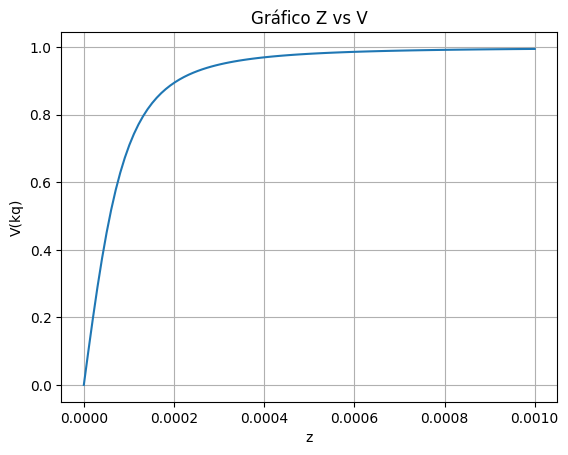

In [23]:
z = np.linspace(0, 0.001, 100)
plt.plot(z, potencial(z, R))
plt.ylabel("V(kq)")
plt.xlabel("z")
plt.title("Gráfico Z vs V")
plt.grid()

In [24]:
# Derivada con Scipy ---> misc.derivate
d = misc.derivative(potencial, 0.0002, dx = 1, args = (R,))
d

<ipython-input-24-f6e241615866>:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d = misc.derivative(potencial, 0.0002, dx = 1, args = (R,))


0.9999999949999995

In [25]:
# Derivada para todos los puntos de un linspace
z = np.linspace(0, 0.001, 100)
derivada = misc.derivative(potencial, z, dx = 1e-6, args = (R,))

<ipython-input-25-8b25832d005b>:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivada = misc.derivative(potencial, z, dx = 1e-6, args = (R,))


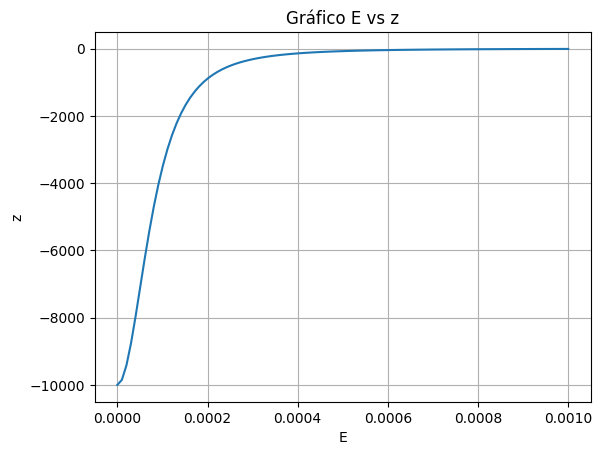

In [27]:
# Gráfica del campo eléctrico E

plt.plot(z, -derivada)
plt.xlabel("E")
plt.ylabel("z")
plt.title("Gráfico E vs z")
plt.grid()

In [10]:
def potencial(z,R, kq):
  if (z >= 0):
    V = (kq*z) / (z**2 + R**2)**(1/2)
  else:
    V = 0
  return V

z = np.linspace(0, 0.002, 100)
R = 0.1e-6
kq = 1

In [11]:
derivative = np.vectorize(misc.derivative, excluded = ["args"]) # hacer la derivada un vector
gradV = derivative(potencial, z, dx = 1e-6, args = (R, kq,))

In [12]:
def potencial(z,R, kq, select):
  if (select == "anillo"):
    V = (kq*z) / (z**2 + R**2)**(1/2)

  elif(select == "disco"):
    V = (kq *2*np.pi *np.sqrt(z**2+R**2)-z) / np.pi*R**2

  else:
    print("Error, la palabra select debe ser anillo o disco")
    V = None
  return V

potencial(0.001, 0.1e-3, kq = 1, select = "disco")

1.6916652380403876e-11

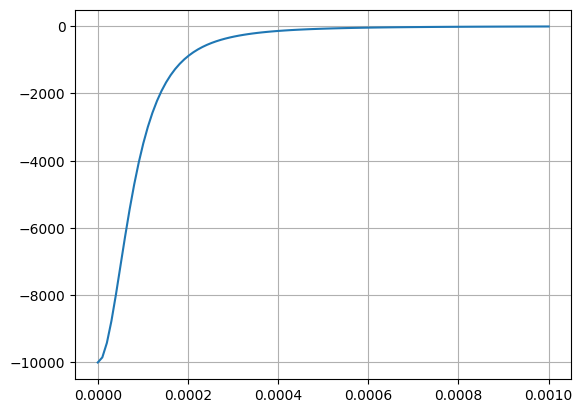

In [13]:
z = np.linspace(0, 0.001, 100)
R = 0.1e-3
kq = 1

derivative = np.vectorize(misc.derivative, excluded=["args"])

derivada = derivative(potencial, z, dx = 1E-6, args = (R,kq,"anillo"))

plt.plot(z, -derivada)
plt.grid()

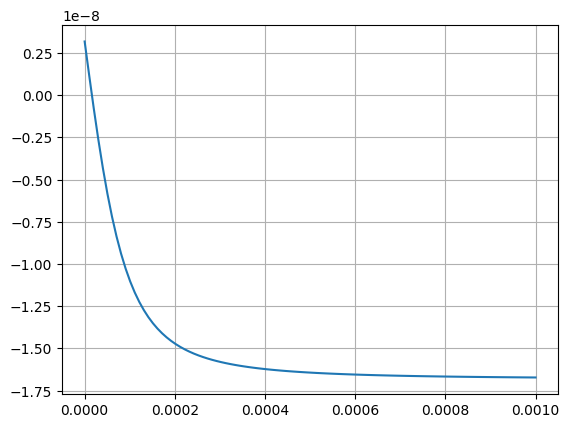

In [14]:
z = np.linspace(0, 0.001, 100)
R = 0.1e-3
kq = 1

derivative = np.vectorize(misc.derivative, excluded=["args"])

derivada = derivative(potencial, z, dx = 1E-6, args = (R,kq,"disco"))

plt.plot(z, -derivada)
plt.grid()

In [15]:
z = np.linspace(0, 0.001, 100)
R = 0.1e-3
kq = 1
select = "otra cosa"

derivative = np.vectorize(misc.derivative, excluded=["args"])
try:
  gradV = derivative(potencial, z, dx = 1e-6, args = (R, kq, select))
  campo_electrico = -gradV
except:
  print("Error, la palabra select debe ser anillo o disco")

Error, la palabra select debe ser anillo o disco
Error, la palabra select debe ser anillo o disco


In [16]:
# Programa que dado z, R, kq, select, me retorne un .txt

import numpy as np
from scipy import misc

z = np.linspace(0, 0.001, 100)
R = 0.1e-3
kq = 1
select = "otra cosa"


def potencial(z,R, kq, select):
  if (select == "anillo"):
    V = (kq*z) / (z**2 + R**2)**(1/2)

  elif(select == "disco"):
    V = (kq *2*np.pi *np.sqrt(z**2+R**2)-z) / np.pi*R**2

  else:
    print("Error, la palabra select debe ser anillo o disco")
    V = None
  return V

derivative = np.vectorize(misc.derivative, excluded=["args"])
try:
  gradV = derivative(potencial, z, dx = 1e-6, args = (R, kq, select))
  campo_electrico = -gradV
  np.savetxt("campo_electrico.txt", campo_electrico) # almacenar

except:
  print("Error, la palabra select debe ser anillo o disco")

Error, la palabra select debe ser anillo o disco
Error, la palabra select debe ser anillo o disco
